## Exploratory Data Analysis – Credit Card Fraud Data

This dataset is highly anonymized and extremely imbalanced.
EDA focuses on transaction amount, time, and class distribution.


📊 Class Distribution

In [1]:
#!/usr/bin/env python3
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from src.data_loader import load_fraud_data, load_ip_country_data
from src.preprocessing import clean_fraud_data
from src.geo_utils import convert_ip_to_int, merge_ip_country
# Load raw data
df = load_fraud_data("../data/raw/creditcard.csv")


df["Class"].value_counts(normalize=True)


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

📊 Amount vs Fraud

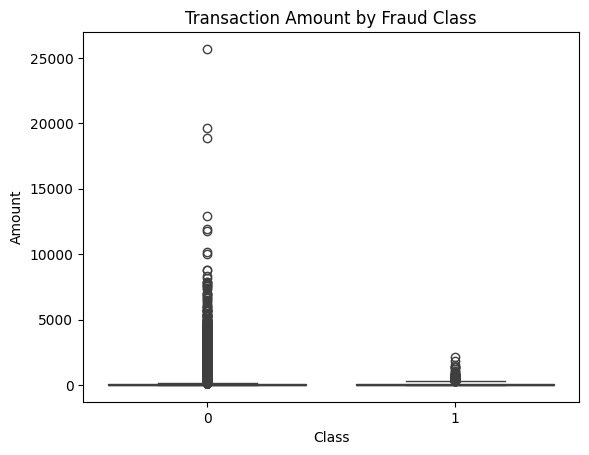

In [2]:
# Purchase Amount vs Fraud
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Transaction Amount by Fraud Class")
plt.show()


📊 Time vs Fraud

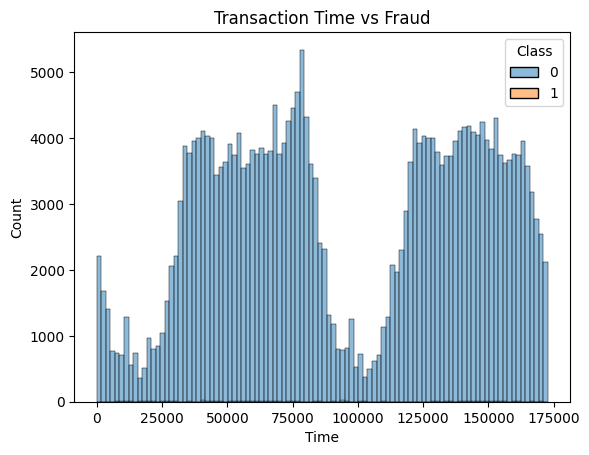

In [3]:
# Time vs Fraud
sns.histplot(data=df, x="Time", hue="Class", bins=100)
plt.title("Transaction Time vs Fraud")
plt.show()